HTSeq library is focused on high-throughput sequencing analyses on large genomes.

Reading in reads

In [65]:
import HTSeq
import itertools
import numpy as np
fastq_file = HTSeq.FastqReader("/Users/nastaliaquintanakarrilo/Downloads/yeast_RNASeq_excerpt_sequence.txt","solexa")

Parsing a fasta file

In [66]:
f = HTSeq.FastaReader('/Users/nastaliaquintanakarrilo/Downloads/fasfaEx.fa.txt')
# iterate over the sequences
for read in f:
    print(read)

AGTACGTAGTCGCTGCTGCTACGGGCGCTAGCTAGTACGTCACGACGTAGATGCTAGCTGACTAAACGATGC
AAACGATCGATCGTACTCGACTGATGTAGTATATACGTCGTACGTAGCATCGTCAGTTACTGCATGCGGG


In [67]:
# Each read is a Sequence object with a few properties, notably name, seq, and descr. 

read.seq

b'AAACGATCGATCGTACTCGACTGATGTAGTATATACGTCGTACGTAGCATCGTCAGTTACTGCATGCGGG'

In [68]:
# Convert each read.seq into a string using decode method
read.seq.decode()

'AAACGATCGATCGTACTCGACTGATGTAGTATATACGTCGTACGTAGCATCGTCAGTTACTGCATGCGGG'

Parsing a fastq file

In [69]:
with HTSeq.FastqReader('/Users/nastaliaquintanakarrilo/Downloads/fastqEx.fastq.txt') as f:
    for read in f:
        print(read.seq)
        print(read.qualstr)

b'AGTACGTAGTCGCTGCTGCTACGGGCGCTAGCTAGTACGTCACGACGTAGATGCTAGCTGACTAAACGATGC'
b'GGGGGGGGGGGGGGGGGGGGGGGGGCGBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH'
b'AAACGATCGATCGTACTCGACTGATGTAGTATATACGTCGTACGTAGCATCGTCAGTTACTGCATGCGGG'
b'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDD???????????????????????'


Each read now has quality scores (whole point of fastq), sequencing quality scores measure the probability that a base is called incorrectly.The higher the quality, the lower the chane of it being a mistake. It is also customary to use numeric values for the base-by-base qualities.

In [70]:
read.qual

array([33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 35, 35, 35, 35, 35, 35, 35, 35, 35, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30], dtype=uint8)

High-throughput sequencing machines commonly produce fastq files. For many types of analysis, the reads are then aligned to a reference genome by a "mapper" or "aligner" software. Most of those software write output alingments as SAM/BAM/CRAM files.

In [71]:
f = HTSeq.SAM_Reader('/Users/nastaliaquintanakarrilo/Downloads/yeast_RNASeq_excerpt_withNH.sam.txt')
with HTSeq.SAM_Reader('/Users/nastaliaquintanakarrilo/Downloads/yeast_RNASeq_excerpt_withNH.sam.txt') as f:
    for i, read in enumerate(f):
        print(read)
        if i == 2:
            break
# For SAM files the iteration is over each single read.

<SAM_Alignment object: Read 'HWI-EAS225:1:10:1284:1974#0/1' aligned to VIII:[394100,394136)/+>
<SAM_Alignment object: Read 'HWI-EAS225:1:10:1284:986#0/1', not aligned>
<SAM_Alignment object: Read 'HWI-EAS225:1:10:1284:2012#0/1' aligned to VII:[1001605,1001641)/+>


In [72]:
with HTSeq.BAM_Reader('/Users/nastaliaquintanakarrilo/Downloads/SRR001432_head.bam') as f:
    for i, read in enumerate(f):
        print(read)
        if i == 2:
            break
# For BAM files the iteration is over read pairs.

<SAM_Alignment object: Read 'SRR001432.1 USI-EAS21_0008_3445:8:1:107:882 length=25', not aligned>
<SAM_Alignment object: Read 'SRR001432.2 USI-EAS21_0008_3445:8:1:82:90 length=25', not aligned>
<SAM_Alignment object: Read 'SRR001432.3 USI-EAS21_0008_3445:8:1:639:904 length=25', not aligned>


[E::idx_find_and_load] Could not retrieve index file for '/Users/nastaliaquintanakarrilo/Downloads/SRR001432_head.bam'


Searching for Transcription Start Sites (TSS)

In [81]:
coverage = HTSeq.GenomicArray("auto", stranded=False, typecode="i")
with HTSeq.BAM_Reader("/Users/nastaliaquintanakarrilo/Downloads/SRR001432_head.bam") as bamfile:
    for almnt in bamfile:
        if almnt.aligned:
            coverage[almnt.iv] += 1

[E::idx_find_and_load] Could not retrieve index file for '/Users/nastaliaquintanakarrilo/Downloads/SRR001432_head.bam'


In [82]:
# This finds the location of TSSs by specific exon
gtf_file = HTSeq.GFF_Reader("/Users/nastaliaquintanakarrilo/Downloads/Homo_sapiens.GRCh37.56_chrom1.gtf")
for feature in itertools.islice(gtf_file,100):
    if feature.type == "exon" and feature.attr["exon_number"] == "1":
        print(feature.attr["gene_id"], feature.attr["transcript_id"], feature.iv.start_d_as_pos)

ENSG00000223972 ENST00000456328 1:11873/+
ENSG00000223972 ENST00000450305 1:12009/+
ENSG00000227232 ENST00000423562 1:29369/-
ENSG00000227232 ENST00000438504 1:29369/-
ENSG00000227232 ENST00000488147 1:29569/-
ENSG00000227232 ENST00000430492 1:29342/-
ENSG00000243485 ENST00000473358 1:29553/+
ENSG00000243485 ENST00000469289 1:30266/+
ENSG00000221311 ENST00000408384 1:30365/+
ENSG00000237613 ENST00000417324 1:36080/-
ENSG00000237613 ENST00000461467 1:36072/-
ENSG00000233004 ENST00000421949 1:53048/+
ENSG00000240361 ENST00000492842 1:62947/+
ENSG00000177693 ENST00000326183 1:69054/+


GTF files will contain several transcripts for each gene, one TSS may appear multiple times.

In [83]:
tsspos = set()
for feature in gtf_file:
    if feature.type == "exon" and feature.attr["exon_number"] == "1":
        tsspos.add(feature.iv.start_d_as_pos)

In [84]:
# Example of one of these starting positions
p = HTSeq.GenomicPosition("1", 145439814, "+")
p in tsspos

True

In [85]:
halfwinwidth = 3000
window = HTSeq.GenomicInterval(p.chrom, p.pos - halfwinwidth, p.pos + halfwinwidth, ".")
window

<GenomicInterval object '1', [145436814,145442814), strand '.'>

In [86]:
list(coverage[window])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [87]:
# checking the coverage with numpy
wincvg = np.fromiter(coverage[window], dtype='i', count=2*halfwinwidth)
wincvg

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

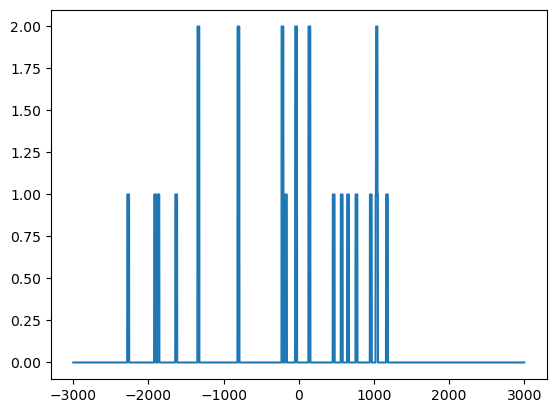

In [88]:
from matplotlib import pyplot as plt
x = np.arange(-halfwinwidth, halfwinwidth)
fig, ax = plt.subplots()
ax.plot(x, wincvg)
plt.show()

In [90]:
profile = np.zeros(2*halfwinwidth, dtype='i')

In [92]:
for p in tsspos:
    window = HTSeq.GenomicInterval(p.chrom, p.pos - halfwinwidth, p.pos + halfwinwidth, ".")
    wincvg = numpy.fromiter(coverage[window], dtype='i', count=2*halfwinwidth)
    if p.strand == "+":
        profile += wincvg
    else:
        profile += wincvg[::-1] 

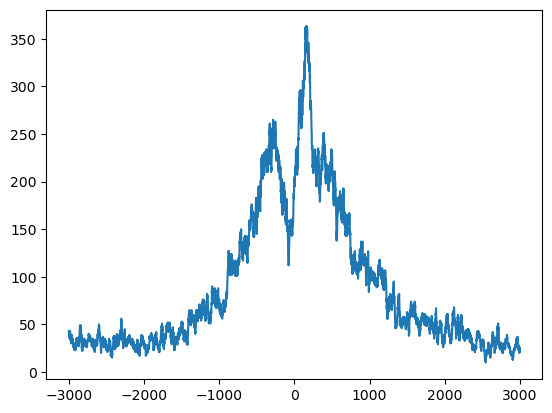

In [93]:
fig, ax = plt.subplots()
x = np.arange(-halfwinwidth,halfwinwidth)
ax.plot(x, profile)
plt.show()

In [96]:
bamfile = HTSeq.BAM_Reader("/Users/nastaliaquintanakarrilo/Downloads/SRR001432_head.bam")
gtffile = HTSeq.GFF_Reader("/Users/nastaliaquintanakarrilo/Downloads/Homo_sapiens.GRCh37.56_chrom1.gtf")
halfwinwidth = 3000
fragmentsize = 200

coverage = HTSeq.GenomicArray("auto", stranded=False, typecode="i")
for almnt in bamfile:
    if almnt.aligned:
        almnt.iv.length = fragmentsize
        coverage[almnt.iv] += 1

tsspos = set()
for feature in gtffile:
    if feature.type == "exon" and feature.attr["exon_number"] == "1":
        tsspos.add(feature.iv.start_d_as_pos)

profile = np.zeros(2 * halfwinwidth, dtype="i")
for p in tsspos:
    window = HTSeq.GenomicInterval(
        p.chrom, p.pos - halfwinwidth, p.pos + halfwinwidth, "."
    )
    wincvg = np.fromiter(coverage[window], dtype="i", count=2 * halfwinwidth)
    if p.strand == "+":
        profile += wincvg
    else:
        profile += wincvg[::-1]

[E::idx_find_and_load] Could not retrieve index file for '/Users/nastaliaquintanakarrilo/Downloads/SRR001432_head.bam'


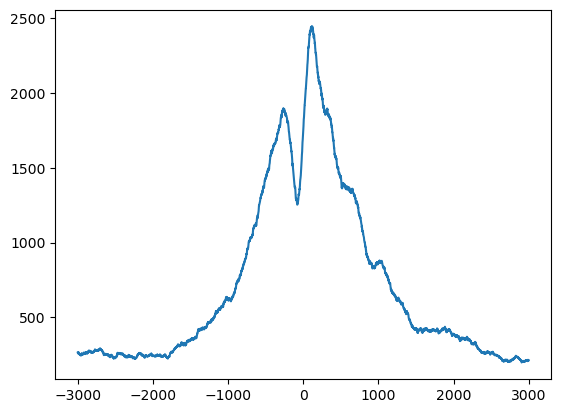

In [97]:
fig, ax = plt.subplots()             
x = numpy.arange(-halfwinwidth, halfwinwidth)  
ax.plot(x, profile)  
plt.show()  

Using indexed BAM files

In [102]:
import os
sortedbamfile = HTSeq.BAM_Reader("/Users/nastaliaquintanakarrilo/Downloads/SRR001432_head_sorted.bam")
if not os.path.exists("/Users/nastaliaquintanakarrilo/Downloads/SRR001432_head_sorted.bam.bai"):
    HTSeq.index()
for almnt in sortedbamfile[window]:
    print(almnt)

<SAM_Alignment object: Read 'SRR001432.203017 USI-EAS21_0008_3445:8:5:185:803 length=25' aligned to 1:[110949750,110949775)/+>
<SAM_Alignment object: Read 'SRR001432.85052 USI-EAS21_0008_3445:8:2:371:375 length=25' aligned to 1:[110950127,110950152)/+>
<SAM_Alignment object: Read 'SRR001432.71642 USI-EAS21_0008_3445:8:2:252:49 length=25' aligned to 1:[110950143,110950168)/+>
<SAM_Alignment object: Read 'SRR001432.26016 USI-EAS21_0008_3445:8:1:163:72 length=25' aligned to 1:[110950528,110950553)/->
<SAM_Alignment object: Read 'SRR001432.132638 USI-EAS21_0008_3445:8:4:553:232 length=25' aligned to 1:[110950868,110950893)/->


In [103]:
fragmentsize = 200
almnt.iv.length = fragmentsize
almnt

<SAM_Alignment object: Read 'SRR001432.132638 USI-EAS21_0008_3445:8:4:553:232 length=25' aligned to 1:[110950693,110950893)/->

In [104]:
start_in_window = p.pos + halfwinwidth - almnt.iv.end
end_in_window = p.pos + halfwinwidth - almnt.iv.start
print(start_in_window, end_in_window)

1939 2139


In [105]:
profileB = np.zeros(2*halfwinwidth, dtype='i')
for p in tsspos:
    window = HTSeq.GenomicInterval(p.chrom, p.pos - halfwinwidth, p.pos + halfwinwidth, ".")
    for almnt in sortedbamfile[window]:
        almnt.iv.length = fragmentsize
        if p.strand == "+":
            start_in_window = almnt.iv.start - p.pos + halfwinwidth
            end_in_window = almnt.iv.end - p.pos + halfwinwidth
        else:
            start_in_window = p.pos + halfwinwidth - almnt.iv.end
            end_in_window = p.pos + halfwinwidth - almnt.iv.start
        profileB[start_in_window : end_in_window] += 1

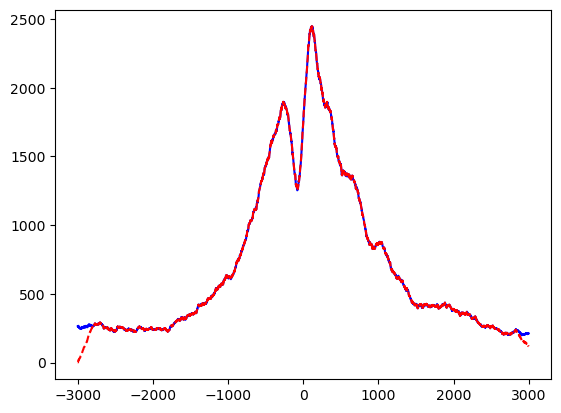

In [106]:
fig, ax = plt.subplots()             
x = numpy.arange(-halfwinwidth, halfwinwidth)  
ax.plot(x, profile, ls="-", color="blue")
ax.plot(x, profileB, ls="--", color="red")  
plt.show()  